In [1]:
import pandas as pd
suffix = 'es'
results = pd.read_csv(f'experiments/rankings_{suffix}.csv')
results.head()

,Color,BT_Score,iteration
0,Amarillo,2.000727e+00,0
1,Azul,1.276982e+00,0
2,Verde,3.343121e-08,0
3,Rojo,-1.276982e+00,0
4,Morado,-2.000727e+00,0


In [2]:
results = results.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
results.columns.name = None
results.head()

,iteration,Amarillo,Azul,Morado,Rojo,Verde
0,0,2.000727,1.276982,-2.000727,-1.276982,3.343121e-08
1,1,0.277001,0.277001,-1.560567,0.503283,5.032827e-01
2,2,0.622911,0.322369,-1.296309,0.175516,1.755133e-01
3,3,0.209768,0.420658,-0.636051,0.106070,-1.004456e-01
4,4,0.164824,0.330321,-0.497859,0.082972,-8.025759e-02


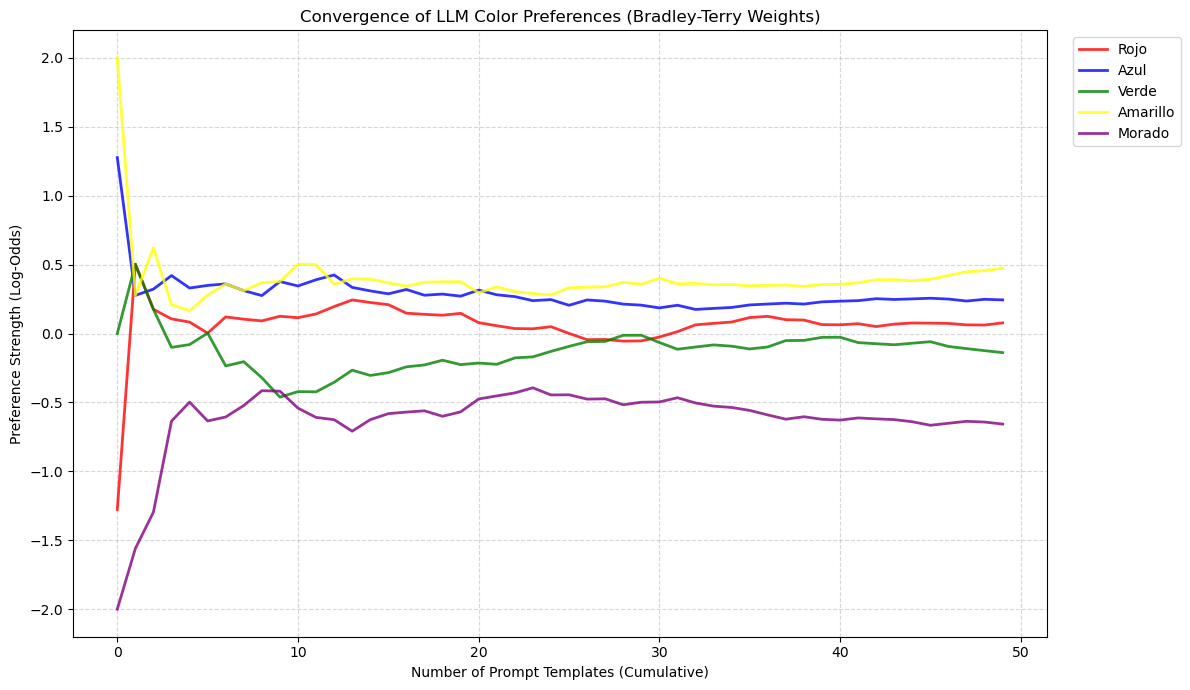

In [3]:
from src.plots import plot_convergence
from src.prompts import color_es_dict

plot_convergence(results, list(color_es_dict.keys()), color_map=color_es_dict)

/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 34013 (\N{CJK UNIFIED IDEOGRAPH-84DD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 32511 (\N{CJK UNIFIED IDEOGRAPH-7EFF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/WhatDoLLMsWant/src/plots.py:29: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/lotanamit5/miniconda3/

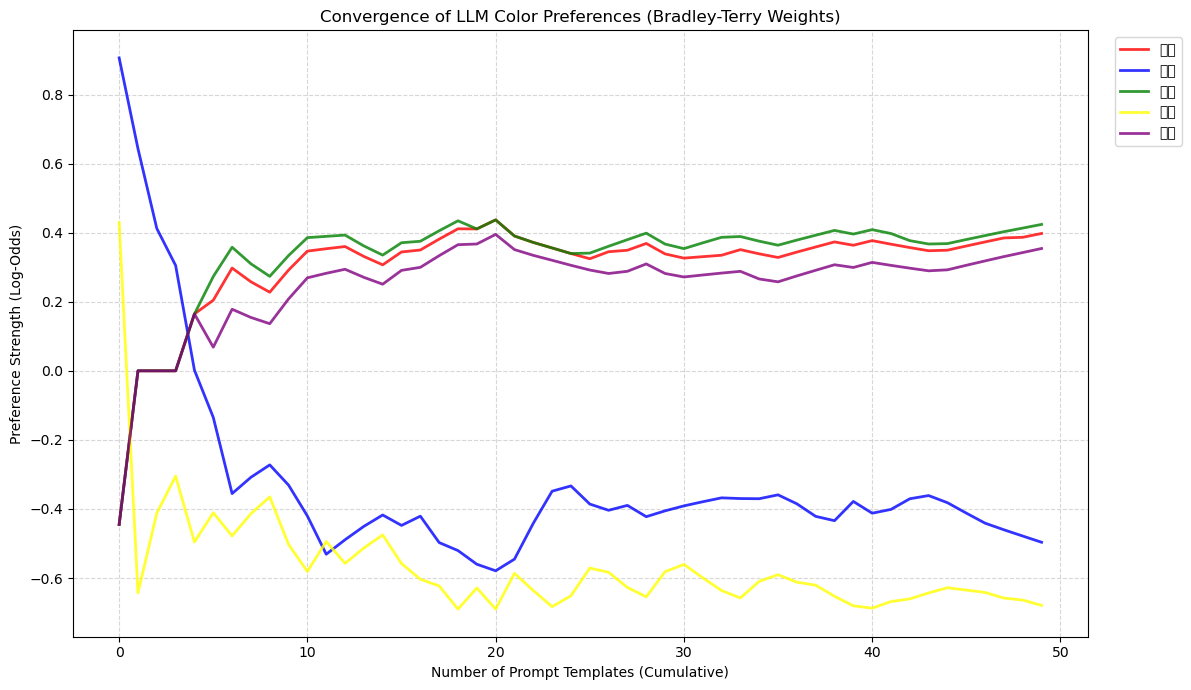

In [7]:
from src.prompts import color_dict_zh
import pandas as pd

suffix = 'zh'
results_zh = pd.read_csv(f'experiments/rankings_{suffix}.csv')
results_zh.head()
results_zh = results_zh.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
results_zh.columns.name = None
plot_convergence(results_zh, list(color_dict_zh.keys()), color_map=color_dict_zh)

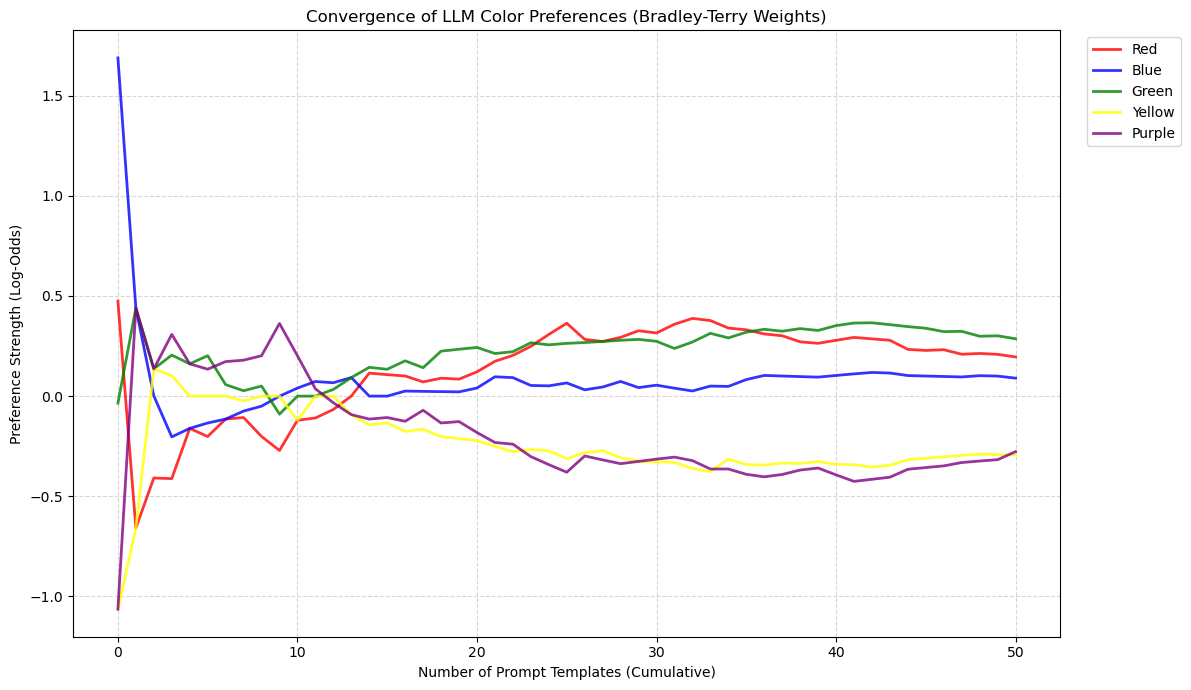

In [5]:
import pandas as pd
from src.prompts import color_en_dict
from src.plots import plot_convergence
suffix = 'en'
results_en = pd.read_csv(f'experiments/rankings_{suffix}.csv')
results_en = results_en.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
results_en.columns.name = None
plot_convergence(results_en, list(color_en_dict.keys()), color_map=color_en_dict)

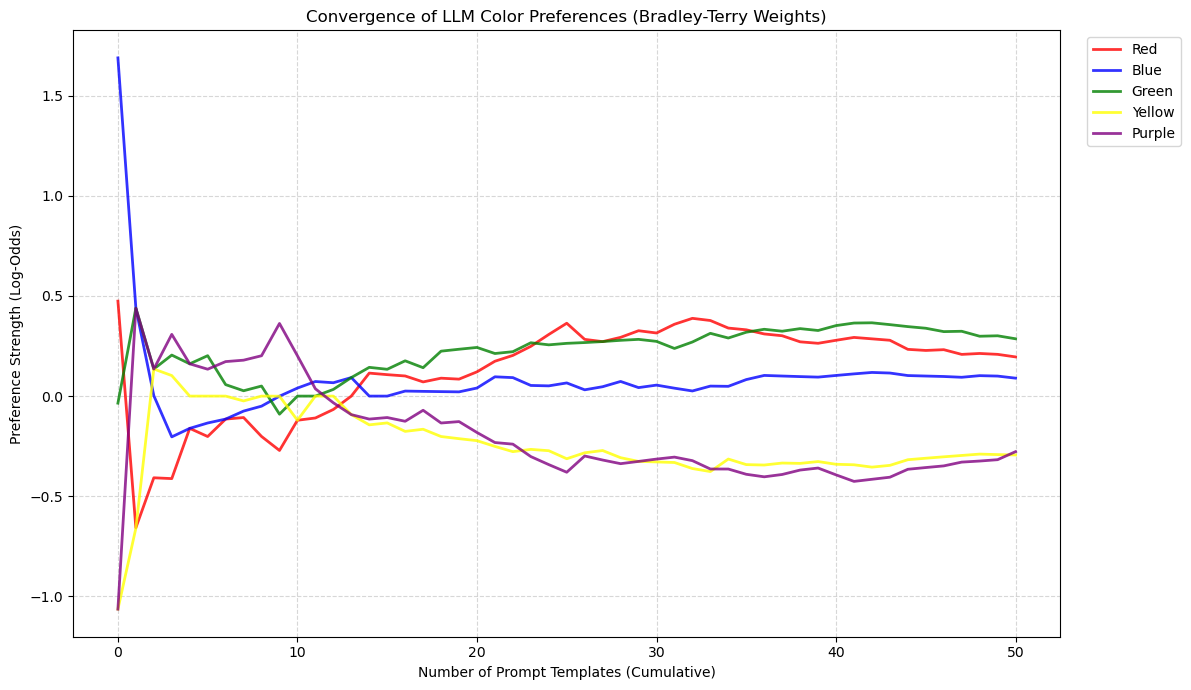

In [15]:
import pandas as pd
from src.pref_models import fit_bradley_terry
from src.plots import plot_convergence
from src.prompts import color_en_dict

results = pd.read_csv(f'experiments/results_en.csv')
colors = list(color_en_dict.keys())
templates = results['template'].unique().tolist()
data = pd.DataFrame()
rankings = []
for i, template in enumerate(templates):
    template_data = results[results['template'] == template]
    data = pd.concat([data, template_data], ignore_index=True)
    ranking, _ = fit_bradley_terry(data, colors)
    rankings.append(ranking.assign(iteration=i))
rankings_df = pd.concat(rankings)
rankings_df = rankings_df.pivot(index='iteration', columns='Color', values='BT_Score').reset_index()
rankings_df.columns.name = None

plot_convergence(rankings_df, colors, color_map=color_en_dict)
